In [44]:
import json
import praw
import tldextract
import pandas as pd

from newspaper import Article
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Set constants

PERSONAL_USE_SCRIPT = '6I4x9ZYW8dvpGA'
CLIENT_SECRET = 'QecjaCsohsbzPHFh3EEkst-gl0g'
USER_AGENT = 'COMP4905Scraper'
USERNAME = 'COMP4905Scraper'
PASSWORD = 'hd6HXJ-3suKwD-E'
TOP_LIMIT = 500
PATH = "data/"

In [56]:
# Log into Reddit

print("Logging into Reddit...")
reddit = praw.Reddit(client_id=PERSONAL_USE_SCRIPT, \
                     client_secret=CLIENT_SECRET, \
                     user_agent=USER_AGENT, \
                     username=USERNAME, \
                     password=PASSWORD)
print("Done")

Logging into Reddit...
Done


In [57]:
# Retrieve top posts from target subreddits

print("Retrieving subreddits...")
subreddit_liberal = reddit.subreddit('liberal')
subreddit_conservative = reddit.subreddit('conservative')

print("Retrieving top posts...")
top_liberal = list(subreddit_liberal.top(limit=TOP_LIMIT))
top_conservative = list(subreddit_conservative.top(limit=TOP_LIMIT))

print("Done")

Retrieving subreddits...
Retrieving top posts...
Done


In [58]:
# Parse top posts

articles = []

print("------Parsing Left-Wing Articles------")
for submission in top_liberal:
    url = submission.url.strip()
    article = Article(url)
    try:
        article.download()
        article.parse()
        if article.text:
            print(article.title)
            articles.append({
#                 "Article": article.text,
                "Label": 0,
                "Domain": tldextract.extract(submission.url).domain,
                "Score": submission.score
            })
    except:
        continue
        
print("\n------Parsing Right-Wing Articles------")
for submission in top_conservative:
    url = submission.url.strip()
    article = Article(url)
    try:
        article.download()
        article.parse()
        if article.text:
            print(article.title)
            articles.append({
#                 "Article": article.text,
                "Label": 1,
                "Domain": tldextract.extract(submission.url).domain,
                "Score": submission.score
            })
    except:
        continue
        
dataset = pd.DataFrame(articles)

------Parsing Left-Wing Articles------
More GOP politicians have been arrested for misconduct in bathrooms than trans people
Trump's pledge to "start winning wars again" is ignorant and delusional — and highly dangerous
Jared Kushner 'admitted Donald Trump lies to his base because he thinks they're stupid'
Chris Murphy: Pence walkout ‘a multi million dollar political stunt paid for by taxpayers’
Doug Jones Pulls Off Electoral Miracle, Beats Alleged Child Molester Roy Moore
Donald Trump suggests Jews might secretly be committing anti-Semitic hate crimes on themselves so he looks bad
Retired Army general says Trump skipped veterans event in France to 'eat cheeseburgers' and 'watch TV'
Donald Trump’s approval a year after election is lower than any president in 70 years of polling
Trump claimed he turned a 'small' $1 million loan from his father into an empire. The New York Times says it was more like $60.7 million in loans
Maine embraces Obamacare, votes to expand Medicaid to 70,000 low-

Obama: Withdrawing from Iran nuclear deal ‘is a serious mistake’
Report: Trump Tried to Bribe Julian Assange With a Presidential Pardon
Trump loses appeal in New York tax case, must hand over returns
Trump’s Speech Shows He Has No Idea What to Do About the Coronavirus
Judge Restores Wisconsin Governor's Powers, Strikes Down GOP Laws
Nearly half of Americans in new poll say they have no confidence 'at all' in Trump
Court ruling requires Trump Organization to turn over hotel records
Did Matt Gaetz Break the Law with Cohen Threat?
Ann Coulter Warns Trump To Not ‘Fall For’ The Migrant Children ‘Actors’
Andrew McCabe Stunned By 'Remarkable' Number Of Russian Contacts In Trump's Circle
Comey says there's 'obviously' evidence Trump obstructed justice in 2017 talk about Flynn
Dems introduce bill requiring disclosure of guest logs from White House, Trump properties
Shocker! Tax Cuts in Hand, CEOs Admit They Won’t Invest Record Profits in Worker Wage Hikes
Mitch McConnell Challenger Amy McGrath 

Facebook co-founder: Tax the rich at 50% to give $500-a-month free cash and fix income inequality
Trump-Loving Troll Who Spread Anti Muslim Propaganda Whines After Her Identity Is Revealed
Obama tells voters to step up or ‘things can get worse’
Beto O'Rourke's torrid fundraising leaves Ted Cruz in the dust, with another $10 million in last 3 months
Saudi Arabia bans journalist for criticising Donald Trump
2018 has been deadlier for schoolchildren than deployed service members
Foxconn factory jobs touted by Trump will not come to pass
Trump Bends to Pelosi’s Will, Accepts Postponement of SOTU
183 Republicans vote against bill to protect people with pre-existing conditions
Colorado governor will sign bill aimed at bypassing Electoral College
It remains unclear if Trump fully understands how the federal debt works
Kirstjen Nielsen Says ‘We Don’t Use Cages for Children’—After U.S. Put Migrant Kids in Cages
Ruth Bader Ginsburg says she is cancer-free
Kyrsten Sinema 32,000 Votes Ahead of Mar

The Guardian Angel for Separated Families: Nora Sandigo
Trump said investigating his finances would be a 'red line.' New York prosecutors are about to cross it.
U.S. Senator Jeff Merkley of Oregon
Obama criticises Trump by name for first time since election: 'A symptom of the politics of fear'
ER doctor confronts Pence over Medicaid cuts in diner
Fox News' Shepard Smith Rips Trump's Hurricane Dorian Blunder As 'Fake News Defined'
NRA Convention Bans Guns To Protect Mike Pence. Parkland Survivors' Jaws Drop.
Trump confidant Stone charged with lying about hacked emails
Mueller is about to drop major new details about 3 of the most important players in the Russia probe
Federal Hate Crime Charges For Driver At Charlottesville White Nationalist Rally
Conservatives are now making fun of a Parkland survivor's GPA and college prospects
Republicans Are Sneaking Right-Wing Social Policies Into Their Corporate Tax Cut
U.S. created 501,000 fewer jobs since 2018 than previously reported, new figure

Rudy Giuliani Just Proved That ‘The President Lies’ Is An Objective Truth
CNN to Trump: You incited this
These Republican Maps Are So Psychedelically Gerrymandered the Supreme Court Might Finally Have to Step In
Nunes should cease silly lawsuits and answer serious questions
Red America Is Becoming a ‘Democracy Desert.’ Coronavirus Threatens to Make It Worse
Trump's coronavirus response highlights why his White House is always in disarray
Please Explain How This Entire Presidency* Isn't a National-Security Crisis
Pelosi: 'I find it a waste of my time' to 'just be talking about what Republicans say'
Second undocumented worker says he worked directly for Eric Trump: report
Schiff plans to obtain Deutsche Bank records of Trump's personal finances
JOHN KERRY: Trump 'really just doesn't know what he's talking about. He makes things up.'
Senator Rand Paul on Twitter
‘This Is Really Bad’: Rick Santorum Has An Ominous 2020 Warning For Trump
Even amongst prison inmates, pedophilia is perceived t

Anti Trump Tough Guy. : Conservative
Obama: It's not racist to be 'disturbed by immigration': 'Everybody has to have some agreed-upon rules'
Shoutout to Kelley O’Hara for hustling to pick up the flag while her teammates were stomping on it : Conservative
Cuban Americans rallying for Trump in the streets of Miami yesterday : Conservative
Idaho Becomes First State to Ban Transgender Atheletes
Women’s March Stripped of Human Rights Award for Its Blatant Antisemitism
Got into something and added subtitle. : Conservative
If I could make my way out to Portland... "Antifa taunting a black Portland police officer, calling him “Uncle Tom” and a “race traitor”. #PortlandProtest : Conservative
Steven fucking Crowder is at my university (UT) and I just caught this beautiful moment on film. : Conservative
Mighell: Don’t Confuse “Alt-Right” with Conservatism
A message to my conservative brothers and sisters. (Sorry if this is not allowed) : Conservative
Ted Cruz: Take El Chapo's $14 Billion in Seize

In [61]:
# Save articles to disk

print("Saving articles to disk...")
Path(PATH).mkdir(parents=True, exist_ok=True)
dataset.to_csv(PATH + "reddit_dataset.csv", index=False)
print("Done")

Saving articles to disk...
Done


In [101]:
numSamples = 100

df_left = dataset.loc[dataset["Label"] == 0][:numSamples]
df_right = dataset.loc[dataset["Label"] == 1][:numSamples]
print(df_left.shape)
print(df_right.shape)

(100, 3)
(100, 3)


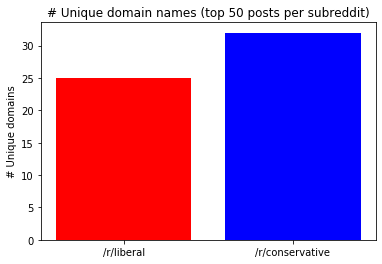

In [97]:
plt.bar(['/r/liberal'], df_left["Domain"].nunique(), color=['red'])
plt.bar(['/r/conservative'], df_right["Domain"].nunique(), color=['blue'])
plt.title('# Unique domain names (top ' + str(numSamples) + ' posts per subreddit)')
plt.ylabel("# Unique domains")
plt.show()

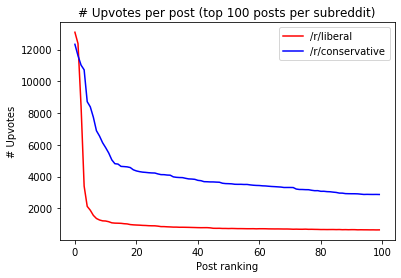

In [102]:
plt.plot(np.arange(df_left.shape[0]), df_left["Score"], color='red')
plt.plot(np.arange(df_right.shape[0]), df_right["Score"], color='blue')
plt.title("# Upvotes per post (top " + str(numSamples) + " posts per subreddit)")
plt.ylabel("# Upvotes")
plt.xlabel("Post ranking")
plt.legend(['/r/liberal', '/r/conservative'])
plt.show()

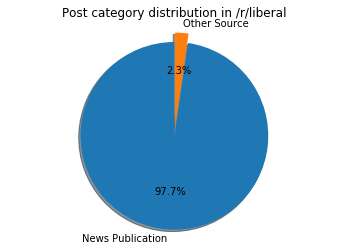

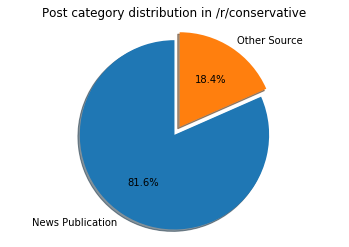

In [108]:
labels = 'News Publication', 'Other Source'
sizes1 = [97.7, 2.3] #100
sizes2 = [81.6, 18.4] #100
explode = [0.1, 0.0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Post category distribution in /r/liberal")
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.title("Post category distribution in /r/conservative")
plt.show()

In [100]:
# Print out unique domain names for each target subreddit

# left_domains = set()
# right_domains = set()

# for submission in top_liberal:
#     left_domains.add(tldextract.extract(submission.url).domain)
# for submission in top_conservative:
#     right_domains.add(tldextract.extract(submission.url).domain)
    
print("LEFT DOMAINS (" + str(df_left["Domain"].nunique()) + ")\n----------")
print(df_left["Domain"].unique())
# for domain in left_domains:
#     print(domain)
print("\n\nRIGHT DOMAINS (" + str(df_right["Domain"].nunique()) + ")\n----------")
print(df_right["Domain"].unique())
# for domain in right_domains:
#     print(domain)

LEFT DOMAINS (25)
----------
['deadstate' 'salon' 'independent' 'thehill' 'thedailybeast' 'theweek'
 'cnbc' 'thinkprogress' 'huffingtonpost' 'politicaldig' 'vice'
 'newrepublic' 'gallup' 'prospect' 'businessinsider' 'go' 'buzzfeed'
 'reddit' 'huffpost' 'rollingstone' 'mediaite' 'opensecrets' 'lawandcrime'
 'rawstory' 'washingtonpost']


RIGHT DOMAINS (32)
----------
['thehill' 'adnkronos' 'imgur' 'redd' 'gizmodo' '9news' 'google' 'pjmedia'
 'dailywire' 'foxnews' 'disrn' 'dailycaller' 'breitbart' 'latimes'
 'reddit' 'thegatewaypundit' 'pluralist' 'xephula' 'skynews' 'cato'
 'westernjournal' 'nytimes' 'independent' 'twitchy' 'mediaite'
 'washingtonexaminer' 'outsports' 'wnd' 'postandcourier' 'conservativeus'
 'legalinsurrection' 'wrdw']
